In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!pip3 install torch torchvision

    100% |████████████████████████████████| 591.8MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61ada000 @  0x7f5276b852a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 23.7MB/s 
    100% |████████████████████████████████| 2.0MB 4.8MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [3]:
!pip install Pillow==5.3.0
#!pip install PIL
!pip install image

In [0]:
# Imports here
import torch
import numpy as np
from torchvision import datasets, models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
from collections import OrderedDict
from torch import optim
from torch.optim import lr_scheduler
import random
import seaborn as sns
%matplotlib inline
import PIL
from PIL import Image

In [0]:
data_dir = '/content/drive/My Drive/colab/flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

In [0]:
# TODO: Define your transforms for the training and validation sets
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),# randomly flip and rotate
    transforms.RandomRotation(45),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
valid_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
# TODO: Load the datasets with ImageFolder

train_datasets = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_datasets = datasets.ImageFolder(valid_dir, transform=valid_transforms)
#train_target, valid_target = torch.tensor(target_list(train_dir)), torch.tensor(target_list(valid_dir))
# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loaders = torch.utils.data.DataLoader(train_datasets, batch_size=32, shuffle=True)
#train_target_loaders = torch.utils.data.DataLoader(train_target, batch_size=64, shuffle=False)
valid_loaders = torch.utils.data.DataLoader(valid_datasets, batch_size=32, shuffle=True)
#valid_target_loaders = torch.utils.data.DataLoader(valid_target, batch_size=64, shuffle=False)


In [0]:
class_names = train_datasets.classes

In [5]:
len(train_loaders.dataset)

6646

In [6]:
len(train_loaders)

208

In [0]:
import json

with open('/content/drive/My Drive/colab/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [8]:
# TODO: Build and train your network
model = models.resnet152(pretrained = True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for param in model.parameters():
    param.requires_grad = False

classifier = nn.Sequential(OrderedDict([
                            #('fc1', nn.Linear(2048, 512)),
                            #('relu1', nn.ReLU()),
                            #('drop_out1', nn.Dropout(0.5)),
                            #('fc2', nn.Linear(4096, 4096)),
                            #('relu2', nn.ReLU()),
                            #('drop_out2', nn.Dropout(0.5)),
                            ('fc', nn.Linear(2048, 102)),
                            ('output', nn.LogSoftmax(dim=1))
                             ]))

model.fc = classifier
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(),lr= 0.005)
sched = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.05)
#sched = lr_scheduler.ReduceLROnPlateau(optimizer)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
def load_model(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    
    if checkpoint['arch'] == 'resnet152':
        model = models.resnet152(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False

    else:
        print("Sorry base architecture not recognized")
        return 
    
    model.class_to_idx = checkpoint['class_to_idx']
    
    # Create the classifier
    classifier = nn.Sequential(OrderedDict([
                          #('fc1', nn.Linear(25088, 4096)),
                          #('relu1', nn.ReLU()),
                          ('fc', nn.Linear(2048, 102)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

    # Put the classifier on the pretrained network
    model.fc = classifier
    
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [0]:
model = load_model('/content/drive/My Drive/checkpoint2_resnet152_lr=0.005.pth')

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for i, param in enumerate(model.parameters()):
    if i ==0 or i==1 or i==2 or i==3:
        continue
    param.requires_grad = True
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr= 1e-5)
sched = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.05)
#sched = lr_scheduler.ReduceLROnPlateau(optimizer)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [12]:
n_epochs =30
valid_loss_min = np.Inf
for e in range(n_epochs):
    train_loss = 0
    valid_loss = 0
    accuracy = 0
    model.train()
    sched.step()
    for train_images, train_target in train_loaders :
        train_images = train_images.to(device)
        train_target = train_target.to(device)
        
        optimizer.zero_grad()
        output = model.forward(train_images)
        loss = criterion(output, train_target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * train_images.size(0) 
    model.eval()
    with torch.no_grad():
        for valid_images, valid_target in valid_loaders:
            valid_images = valid_images.to(device)
            valid_target = valid_target.to(device)
            output = model.forward(valid_images)
            loss = criterion(output, valid_target)
            valid_loss += loss.item() * valid_images.size(0)
            ps = torch.exp(output)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == valid_target.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                 
    train_loss = train_loss/len(train_loaders.dataset)
    valid_loss = valid_loss/len(valid_loaders.dataset)
    accuracy = accuracy/len(valid_loaders)
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.6f}'
          .format(
        e, train_loss, valid_loss, accuracy))
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_resnet152_colab.pt')
        valid_loss_min = valid_loss
    #sched.step(valid_loss)
    #sched.step()


Epoch: 0 	Training Loss: 0.055088 	Validation Loss: 0.151177 	Validation Accuracy: 0.963472
Validation loss decreased (inf --> 0.151177).  Saving model ...
Epoch: 1 	Training Loss: 0.029814 	Validation Loss: 0.129021 	Validation Accuracy: 0.971154
Validation loss decreased (0.151177 --> 0.129021).  Saving model ...
Epoch: 2 	Training Loss: 0.018000 	Validation Loss: 0.109180 	Validation Accuracy: 0.974289
Validation loss decreased (0.129021 --> 0.109180).  Saving model ...
Epoch: 3 	Training Loss: 0.014561 	Validation Loss: 0.118711 	Validation Accuracy: 0.971885
Epoch: 4 	Training Loss: 0.010454 	Validation Loss: 0.114044 	Validation Accuracy: 0.971885
Epoch: 5 	Training Loss: 0.009814 	Validation Loss: 0.119996 	Validation Accuracy: 0.968750
Epoch: 6 	Training Loss: 0.009444 	Validation Loss: 0.116180 	Validation Accuracy: 0.968280
Epoch: 7 	Training Loss: 0.007243 	Validation Loss: 0.112067 	Validation Accuracy: 0.971154
Epoch: 8 	Training Loss: 0.007841 	Validation Loss: 0.113163 	

In [0]:
model.load_state_dict(torch.load('model_resnet152_colab.pt'))

In [0]:
model.class_to_idx = train_datasets.class_to_idx
model.cpu()
torch.save({'arch': 'resnet152',
            'state_dict': model.state_dict(), 
            'class_to_idx': model.class_to_idx}, 
            'classifier.pth')

In [0]:
model_save_name = 'checkpoint2_resnet152_lr=0.005_training_twice.pth'
path = F"/content/drive/My Drive/{model_save_name}" 
torch.save(torch.load('classifier.pth'), path)

In [0]:
model = load_model('classifier.pth')

In [0]:
from PIL import Image

def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    image = Image.open(image_path)
    #image.show()
    resize_transform = transforms.Resize(256)
    center_crop_transform = transforms.CenterCrop(224)
    tensor_transform = transforms.ToTensor()
    normalize_transform = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    image = resize_transform(image)
    image = center_crop_transform(image)
    image = tensor_transform(image)
    image = normalize_transform(image)
    np_image = np.array(image, dtype = np.float64)

    return np_image
    # TODO: Process a PIL image for use in a PyTorch model

In [0]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    #print(image.shape)
    image = image.transpose((1, 2, 0))
    #print(image.shape)
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [0]:
 
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    np_image = process_image(image_path)
    #imshow(np_image)
    image = torch.from_numpy(np_image)
    #reshape the image from (3,224,224) to (1,3,224,224) to match the input shape of VGG-19_bn
    
    image = image.view((1,3,224,224))
    image = image.type(torch.FloatTensor)
    #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    #model.to(device)
    model.eval()
    with torch.no_grad():
            #image = image.to(device)
            logps = model.forward(image)
            # get exp as I'm using nn.NLLLoss() and nn.LogSoftMax()
            ps = torch.exp(logps)
            #print(ps)
            top_p, top_indicies = ps.topk(5, dim=1)
    top_p = top_p.detach().numpy().tolist()[0] 
    top_indicies = top_indicies.detach().numpy().tolist()[0]
    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    top_classes = [idx_to_class[index] for index in top_indicies]
    top_flowers = [cat_to_name[idx_to_class[index]] for index in top_indicies]        
    #imshow(image.cpu())
    return top_p, top_classes, top_flowers
    # TODO: Implement the code to predict the class from an image file

In [0]:
def plot_solution(image_path, model):
    # Set up plot
    plt.figure(figsize = (6,10))
    ax = plt.subplot(2,1,1)

    # Set up title
    flower_num = image_path.split('/')[7]
    title_ = cat_to_name[flower_num]

    # Plot flower
    img = process_image(image_path)
    imshow(img, ax, title = title_);

    # Make prediction
    probs, classes, flowers = predict(image_path, model) 

    # Plot bar chart
    plt.subplot(2,1,2)
    sns.barplot(x=probs, y=flowers, color=sns.color_palette()[0]);
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


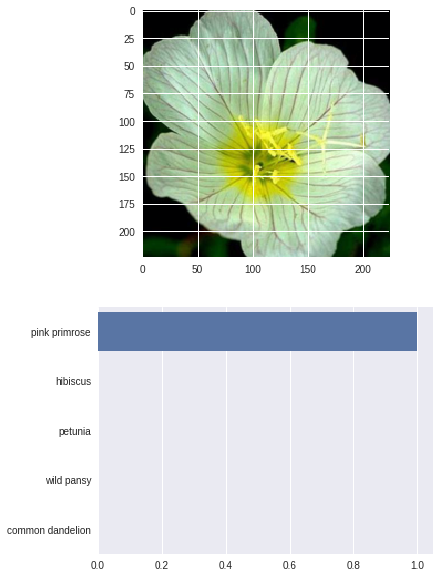

In [0]:
# TODO: Display an image along with the top 5 classes
plot_solution('/content/drive/My Drive/colab/flower_data/valid/1/image_06739.jpg', model)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


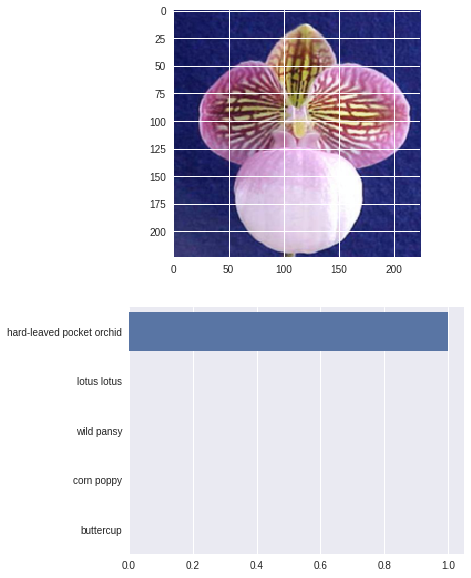

In [0]:
plot_solution('/content/drive/My Drive/colab/flower_data/valid/2/image_05094.jpg', model)